In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from astropy.io import fits
from astropy.table import Table
import subprocess
from pathlib import Path

from scipy.odr import ODR, Model, RealData

from dotenv import load_dotenv
load_dotenv(override=True)

ROOT_PATH = os.environ.get('ROOT_PATH')
if not ROOT_PATH in sys.path: sys.path.append(ROOT_PATH)

from main_code.utils.constants import *
from main_code.utils.CosmoFunc import *
from main_code.filepaths import GENRMOCKFP_TEMPLATE_FILEPATH, GENRMOCKFP_CPP_FILEPATH
from main_code.utils.functions import density_contour
from main_code.A_generate_mocks import generate_genrmockfp_file

# Histogram

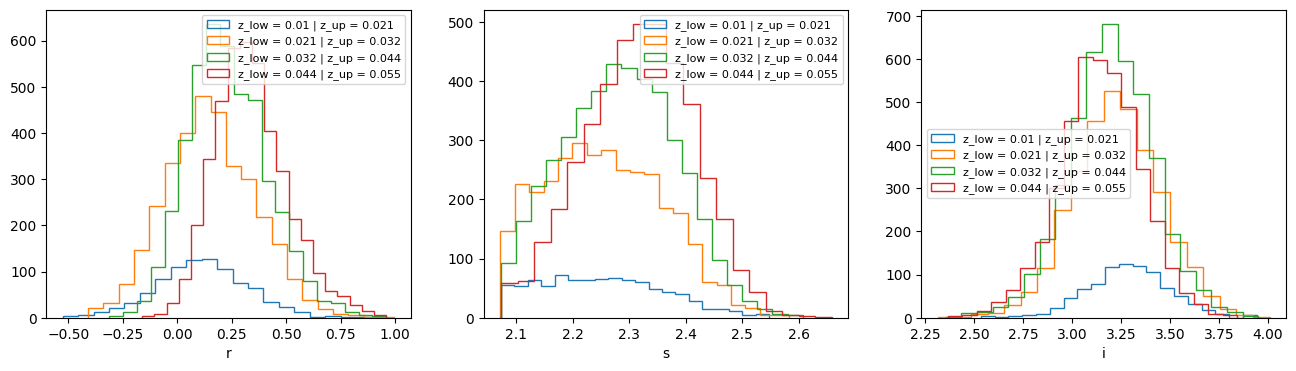

In [17]:
# Combine surveys
df_combined = pd.DataFrame()
for survey in ["6dFGS", "SDSS", "LAMOST"]:
    df_temp = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")
    df_temp["survey"] = survey
    df_combined = pd.concat([df_combined, df_temp], axis=0).reset_index(drop=True)

# Take redshift subsamples
z_edges = np.linspace(0.01, 0.055, 5)
z_bins = [(z_edges[i], z_edges[i+1]) for i in range(len(z_edges) - 1)]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8 * 3 / 1.5, 6 / 1.5))
for i, (z_lower, z_upper) in enumerate(z_bins):
    df = df_combined.copy()
    df = df[(df["z_dist_est"] >= z_lower) & (df["z_dist_est"] < z_upper)]

    # Ax1: r
    ax1.hist(df["r"], bins=20, histtype="step", label=f"z_low = {np.round(z_lower, 3)} | z_up = {np.round(z_upper, 3)}")
    ax1.set_xlabel("r")
    ax1.legend(fontsize=8)


    # Ax2: s
    ax2.hist(df["s"], bins=20, histtype="step", label=f"z_low = {np.round(z_lower, 3)} | z_up = {np.round(z_upper, 3)}")
    ax2.set_xlabel("s")
    ax2.legend(fontsize=8)


    # Ax1: r
    ax3.hist(df["i"], bins=20, histtype="step", label=f"z_low = {np.round(z_lower, 3)} | z_up = {np.round(z_upper, 3)}")
    ax3.set_xlabel("i")
    ax3.legend(fontsize=8)

# 2D distribution

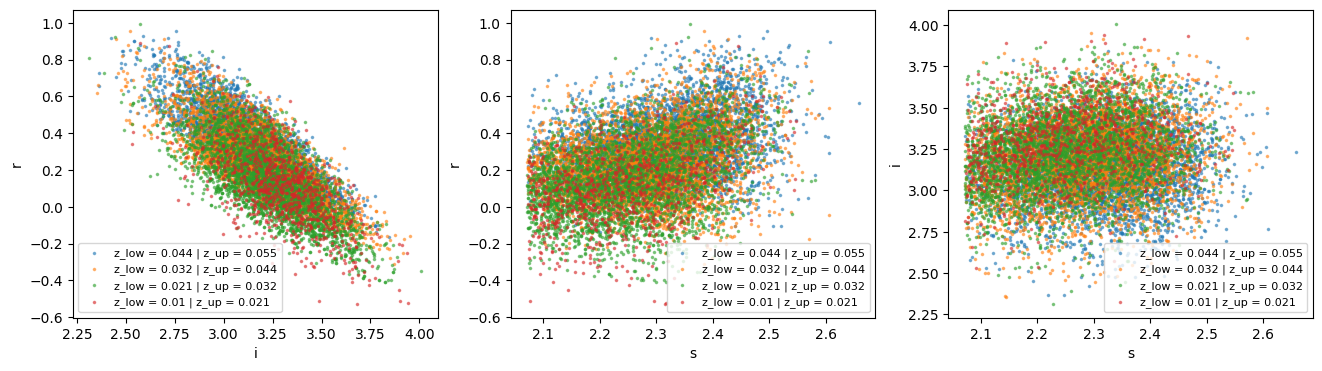

In [19]:
# Combine surveys
df_combined = pd.DataFrame()
for survey in ["6dFGS", "SDSS", "LAMOST"]:
    df_temp = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")
    df_temp["survey"] = survey
    df_combined = pd.concat([df_combined, df_temp], axis=0).reset_index(drop=True)

# Take redshift subsamples
z_edges = np.linspace(0.01, 0.055, 5)
z_bins = [(z_edges[i], z_edges[i+1]) for i in range(len(z_edges) - 1)]

# Combinations to plot
combos = [("i", "r"), ("s", "r"), ("s", "i")]

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8 * 3 / 1.5, 6 / 1.5))
for i, (z_lower, z_upper) in enumerate(z_bins[::-1]):

    df = df_combined.copy()
    df = df[(df["z_dist_est"] >= z_lower) & (df["z_dist_est"] < z_upper)]

    # Ax1: r vs i
    ax1.scatter(df["i"], df["r"], s=2.5, alpha=0.5, label=f"z_low = {np.round(z_lower, 3)} | z_up = {np.round(z_upper, 3)}")
    ax1.set_xlabel("i")
    ax1.set_ylabel("r")
    ax1.legend(fontsize=8)


    # Ax2: r vs s
    ax2.scatter(df["s"], df["r"], s=2.5, alpha=0.5, label=f"z_low = {np.round(z_lower, 3)} | z_up = {np.round(z_upper, 3)}")
    ax2.set_xlabel("s")
    ax2.set_ylabel("r")
    ax2.legend(fontsize=8)


    # Ax3: i vs s
    ax3.scatter(df["s"], df["i"], s=2.5, alpha=0.5, label=f"z_low = {np.round(z_lower, 3)} | z_up = {np.round(z_upper, 3)}")
    ax3.set_xlabel("s")
    ax3.set_ylabel("i")
    ax3.legend(fontsize=8)

# Plot param vs redshift

Text(0, 0.5, 'i')

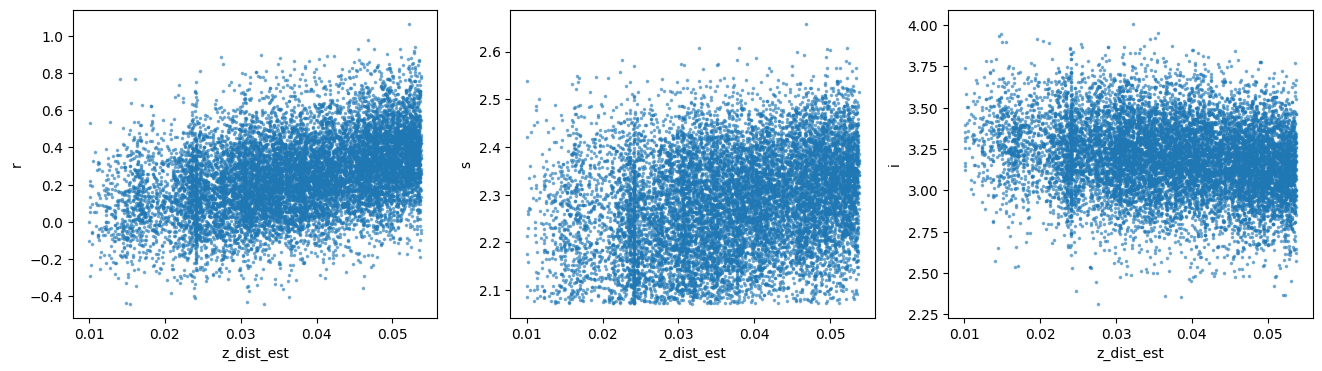

In [5]:
# Combine surveys
df_combined = pd.DataFrame()
for survey in ["6dFGS", "SDSS", "LAMOST"]:
    df_temp = pd.read_csv(f"../../data/foundation/logdist/smin_setting_1/fp_fit_method_0/{survey.lower()}.csv")
    df_temp["survey"] = survey
    df_combined = pd.concat([df_combined, df_temp], axis=0).reset_index(drop=True)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(8 * 3 / 1.5, 6 / 1.5))
df = df_combined.copy()

# Ax1: r vs z
ax1.scatter(df["z_dist_est"], df["r"] - df["logdist_all_combined"], s=2.5, alpha=0.5)
ax1.set_xlabel("z_dist_est")
ax1.set_ylabel("r")


# Ax2: s vs z
ax2.scatter(df["z_dist_est"], df["s"], s=2.5, alpha=0.5)
ax2.set_xlabel("z_dist_est")
ax2.set_ylabel("s")


# Ax3: i vs z
ax3.scatter(df["z_dist_est"], df["i"], s=2.5, alpha=0.5)
ax3.set_xlabel("z_dist_est")
ax3.set_ylabel("i")